# Introduction

- This notebook contains data preparation, EDA and modeling steps for the Medical Insurance Premium prediction project

# Data preparation

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import xgboost as xgb

from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import export_text

from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('medicalpremium.csv')
df.columns = df.columns.str.lower()

df.head()

,age,diabetes,bloodpressureproblems,anytransplants,anychronicdiseases,height,weight,knownallergies,historyofcancerinfamily,numberofmajorsurgeries,premiumprice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [3]:
df.columns

Index(['age', 'diabetes', 'bloodpressureproblems', 'anytransplants',
       'anychronicdiseases', 'height', 'weight', 'knownallergies',
       'historyofcancerinfamily', 'numberofmajorsurgeries', 'premiumprice'],
      dtype='object')

In [4]:
numerical = ['age', 'height', 'weight', 'premiumprice']
categorical = ['diabetes', 'bloodpressureproblems', 'anytransplants', 'anychronicdiseases', 
               'knownallergies', 'historyofcancerinfamily', 'numberofmajorsurgeries']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      986 non-null    int64
 1   diabetes                 986 non-null    int64
 2   bloodpressureproblems    986 non-null    int64
 3   anytransplants           986 non-null    int64
 4   anychronicdiseases       986 non-null    int64
 5   height                   986 non-null    int64
 6   weight                   986 non-null    int64
 7   knownallergies           986 non-null    int64
 8   historyofcancerinfamily  986 non-null    int64
 9   numberofmajorsurgeries   986 non-null    int64
 10  premiumprice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [6]:
df.describe()

,age,diabetes,bloodpressureproblems,anytransplants,anychronicdiseases,height,weight,knownallergies,historyofcancerinfamily,numberofmajorsurgeries,premiumprice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [7]:
df.isnull().sum(axis = 0)

age                        0
diabetes                   0
bloodpressureproblems      0
anytransplants             0
anychronicdiseases         0
height                     0
weight                     0
knownallergies             0
historyofcancerinfamily    0
numberofmajorsurgeries     0
premiumprice               0
dtype: int64

In [8]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)

len(df_train), len(df_val), len(df_test)

(591, 197, 198)

In [9]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [10]:
y_train = df_train['premiumprice'].values
y_val = df_val['premiumprice'].values
y_test = df_test['premiumprice'].values

- As a result of preparation step, the data was loaded and split into training, validation and test samples in the proportion of 60-20-20. No null values were found, column names were formatted. No outliers were found during initial analysis. 


# Exploratory Data Analysis

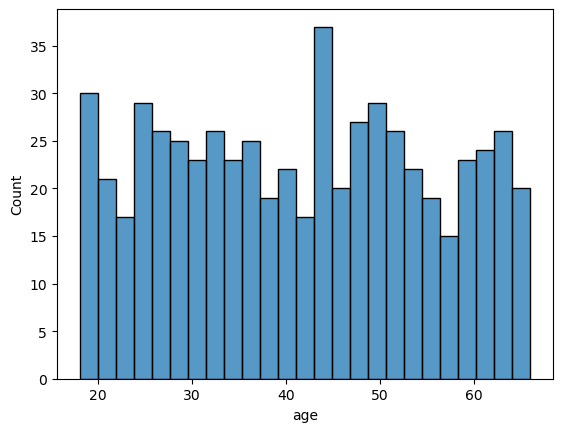

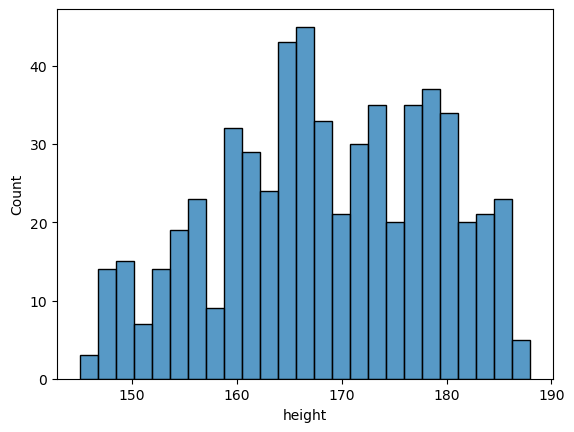

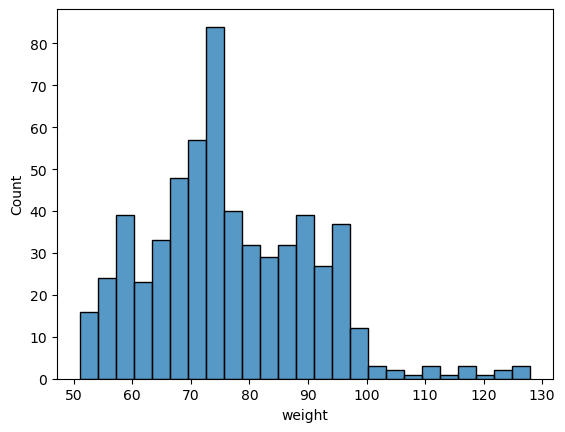

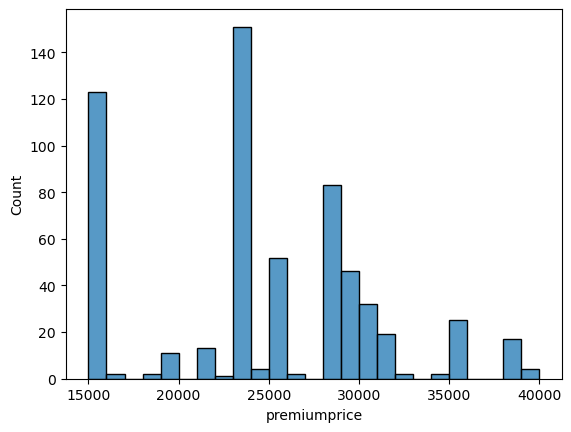

In [11]:
for col in numerical:
    fig = sns.histplot(df_train[col], bins = 25)
    plt.show()

- From histograms for numerical values it can be seen that values are not normally distributed. This could be caused by the fact that this dataset is "dummy" and a low number of observations.

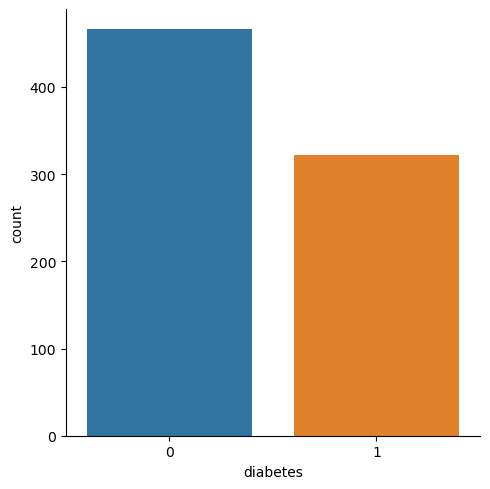

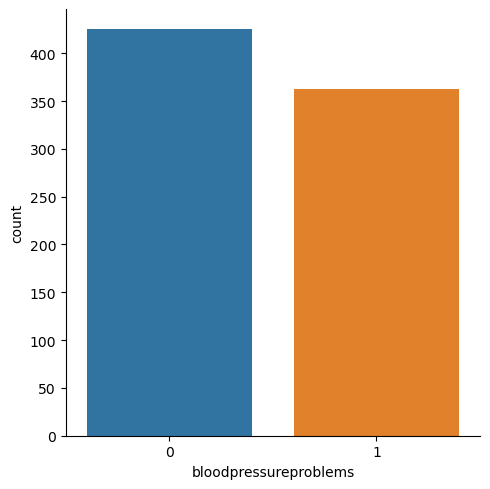

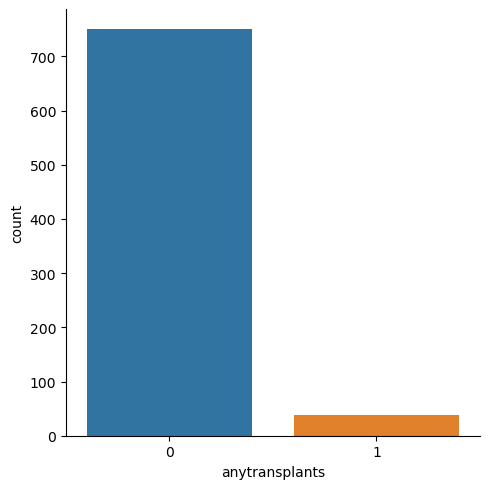

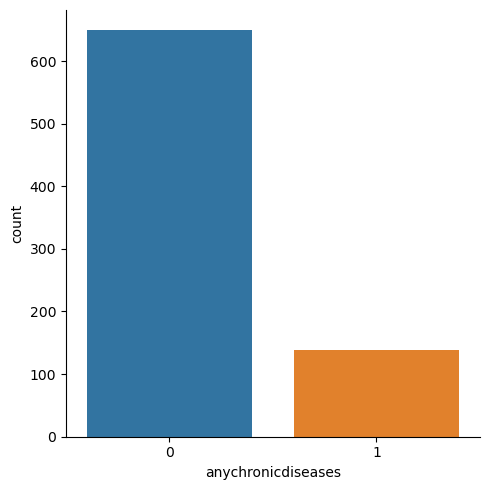

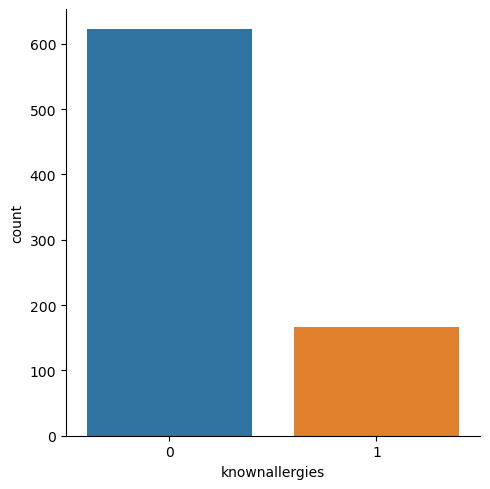

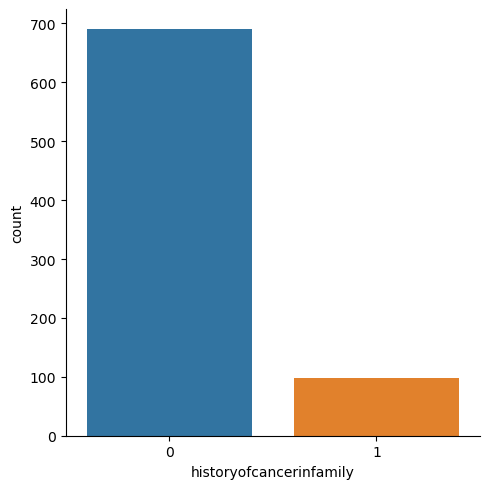

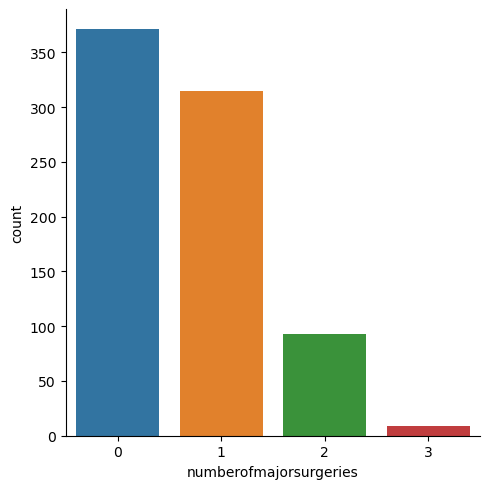

In [12]:
for col in categorical:
    fig = sns.catplot(x = col, kind = "count", data = df_full_train)
    plt.show()

- Counts by groups for categorical variables show that we have almost the same sizes of groups with and without diabetes and blood pressure problems. Also, count of people that have no major surgeries and those that had a surgery at least once is close.

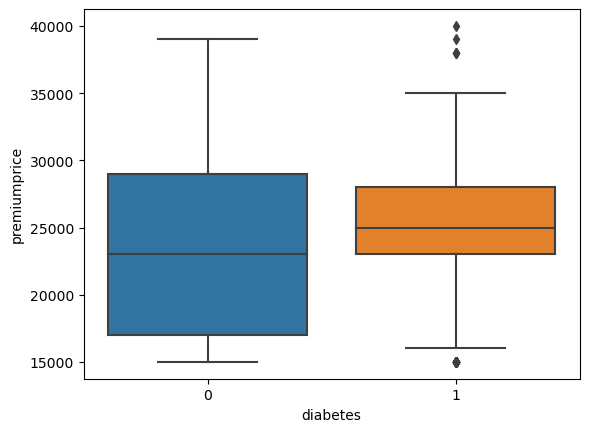

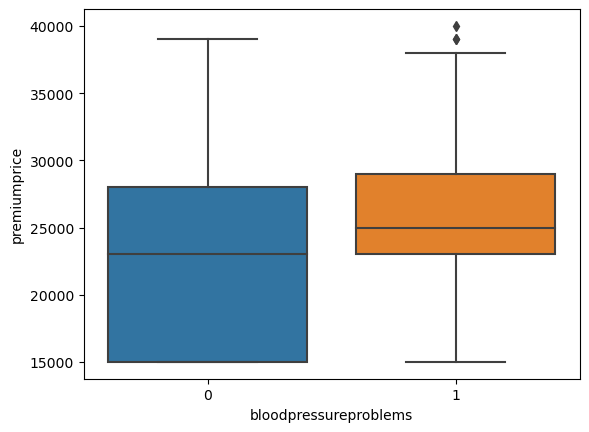

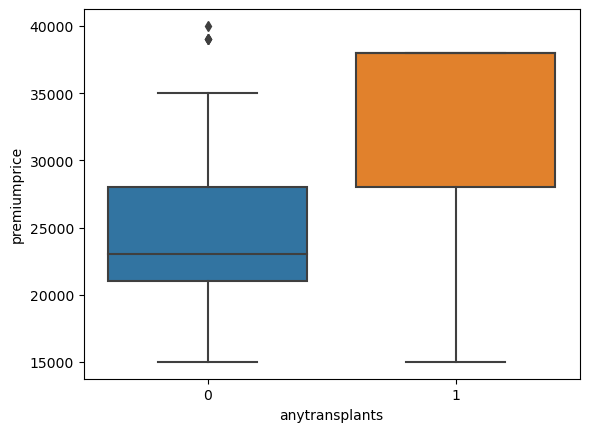

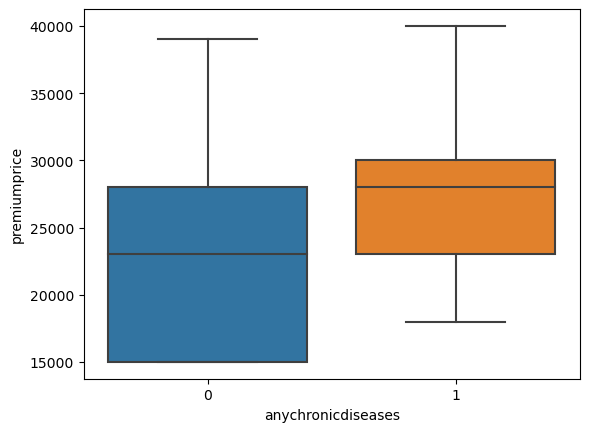

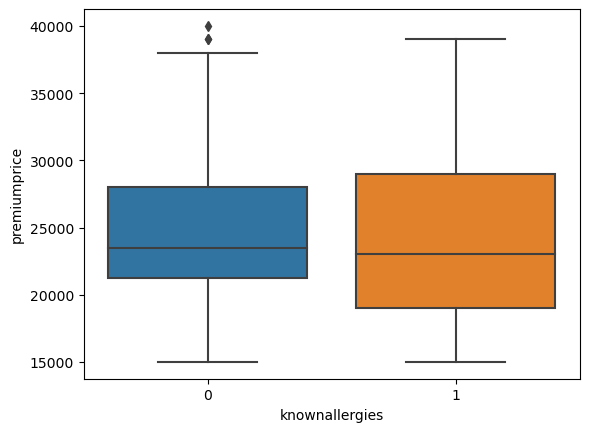

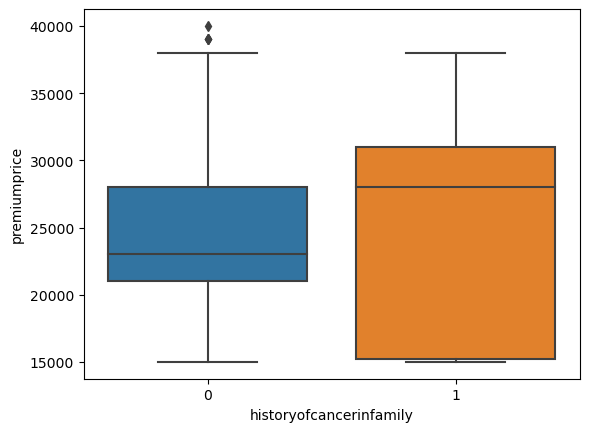

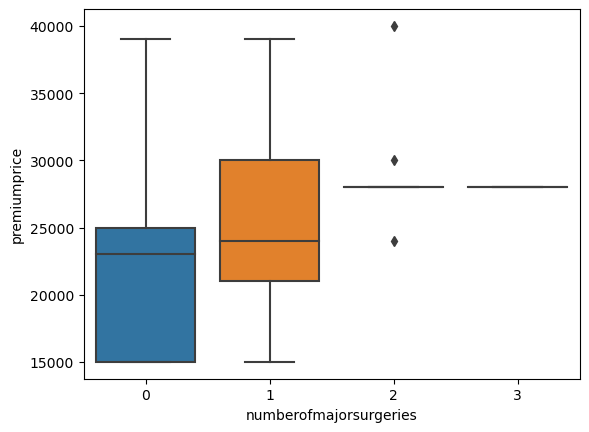

In [13]:
for col in categorical:
    fig = sns.boxplot(x = col, y = 'premiumprice', data = df_train)
    plt.show()

- Boxplots show that distributions of groups are skewed rather than symmetric. Median premium values for people with transplants, chronic diseases and history of cancer in family differ significantly from those who don't have such conditions. General conclusion is that any health related issues result in higher premium prices for such groups.

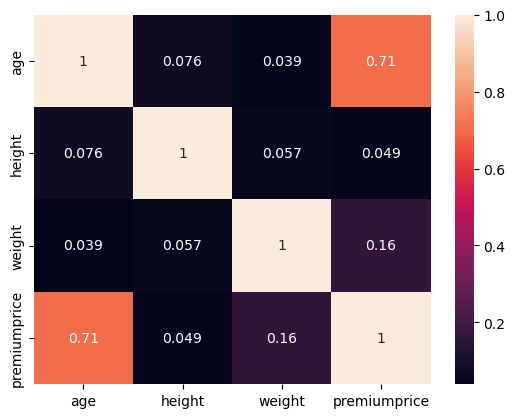

In [14]:
corrMatrix = df_train[numerical].corr().round(3)
sns.heatmap(corrMatrix, annot=True)

plt.show()

- Correlation matrix shows strong correlation between age variable and premium price variable. Other variables have low correlation with each other.

# Model Training

In [15]:
y_train = np.log1p(df_train['premiumprice'].values)
y_val = np.log1p(df_val['premiumprice'].values)
y_test = np.log1p(df_test['premiumprice'].values)

In [16]:
del df_train['premiumprice']
del df_val['premiumprice']
del df_test['premiumprice']

In [17]:
dv = DictVectorizer(sparse = False)

train_dict = df_train.to_dict(orient = 'records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient = 'records')
X_val = dv.transform(val_dict)

In [18]:
dv.get_feature_names_out()

array(['age', 'anychronicdiseases', 'anytransplants',
       'bloodpressureproblems', 'diabetes', 'height',
       'historyofcancerinfamily', 'knownallergies',
       'numberofmajorsurgeries', 'weight'], dtype=object)

In [19]:
X_train.shape

(591, 10)

## Linear Regression

In [20]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_train)

print("RMSE: %.4f" % mean_squared_error(y_train, y_pred, squared = False))
print("R^2: %.4f" % r2_score(y_train, y_pred))

RMSE: 0.1562
R^2: 0.6686


In [21]:
feature_names_out = dv.get_feature_names_out()
dict(zip(feature_names_out, linreg.coef_.round(3)))

{'age': 0.015,
 'anychronicdiseases': 0.119,
 'anytransplants': 0.289,
 'bloodpressureproblems': 0.015,
 'diabetes': -0.02,
 'height': 0.0,
 'historyofcancerinfamily': 0.06,
 'knownallergies': 0.013,
 'numberofmajorsurgeries': -0.031,
 'weight': 0.002}

Text(0.5, 0, 'Premium price')

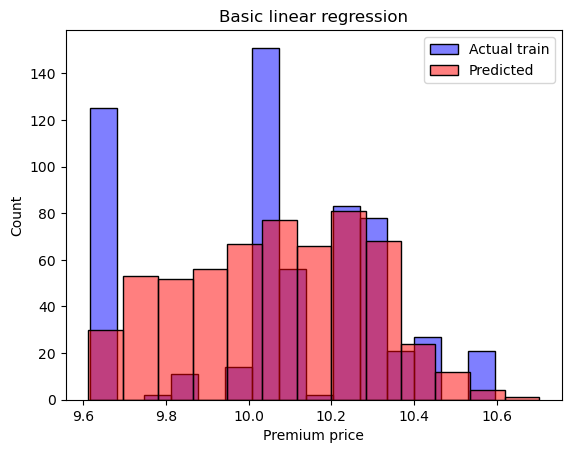

In [22]:
sns.histplot(y_train, color = 'b', label = "Actual train", alpha = 0.5)
sns.histplot(y_pred, color = 'r', label = "Predicted", alpha = 0.5)
plt.legend()
plt.title("Basic linear regression")
plt.xlabel("Premium price")

In [23]:
#Checking on the validation data
y_pred = linreg.predict(X_val)

print("RMSE: %.4f" % mean_squared_error(y_val, y_pred, squared = False))
print("R^2: %.4f" % r2_score(y_val, y_pred))

RMSE: 0.1564
R^2: 0.6637


In [24]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [25]:
ridge = Ridge(alpha = 1.0)
ridge.fit(X_train_scaled, y_train)

y_pred = ridge.predict(X_val_scaled)

print("RMSE: %.4f" % mean_squared_error(y_val, y_pred, squared = False))
print("R^2: %.4f" % r2_score(y_val, y_pred))

RMSE: 0.1564
R^2: 0.6638


In [26]:
dict(zip(dv.get_feature_names_out(), ridge.coef_.round(3)))

{'age': 0.212,
 'anychronicdiseases': 0.047,
 'anytransplants': 0.06,
 'bloodpressureproblems': 0.008,
 'diabetes': -0.01,
 'height': 0.001,
 'historyofcancerinfamily': 0.019,
 'knownallergies': 0.005,
 'numberofmajorsurgeries': -0.023,
 'weight': 0.032}

Text(0.5, 0, 'Premium price')

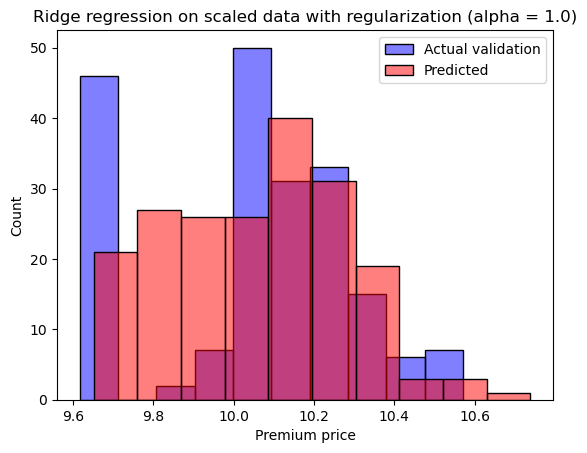

In [27]:
sns.histplot(y_val, color = 'b', label = "Actual validation", alpha = 0.5)
sns.histplot(y_pred, color = 'r', label = "Predicted", alpha = 0.5)
plt.legend()
plt.title("Ridge regression on scaled data with regularization (alpha = 1.0)")
plt.xlabel("Premium price")

- Two linear models were trained and estimated on the data. Simple linear regression resulted in RMSE = 0.1564 and R-squared = 0.6637. Ridge regression was also trained on the scaled data with the regularization parameter = 1. Despite the fact that results did not improve significantly, the ridge model on scaled data is preferable. 


## Random Forest

In [28]:
rf = RandomForestRegressor(n_estimators = 10, random_state = 1, n_jobs=-1)

rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [29]:
y_pred = rf.predict(X_val)

print(mean_squared_error(y_val, y_pred, squared=False))

0.11727674492347472


In [30]:
scores = []
n_estimators = np.linspace(10, 100, 10, dtype = int)

for n in n_estimators:
    
    rf_test = RandomForestRegressor(n_estimators = n, random_state = 1)
    rf_test.fit(X_train, y_train)
    
    y_pred = rf_test.predict(X_val)
    score = mean_squared_error(y_val, y_pred, squared = False)
    print('n: ', n, ', RMSE: ', score)
    
    scores.append(score)

n:  10 , RMSE:  0.1172767449234747
n:  20 , RMSE:  0.11451405848099279
n:  30 , RMSE:  0.11192137227517628
n:  40 , RMSE:  0.11168692905876644
n:  50 , RMSE:  0.11152744270277135
n:  60 , RMSE:  0.11205809246319526
n:  70 , RMSE:  0.11194201741416279
n:  80 , RMSE:  0.11165768171656172
n:  90 , RMSE:  0.11223530487844807
n:  100 , RMSE:  0.11226039984363971


Text(0, 0.5, 'RMSE')

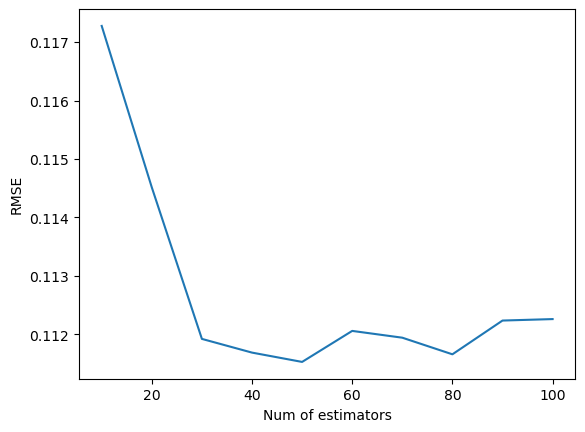

In [31]:
plt.plot(n_estimators, scores)
plt.xlabel("Num of estimators")
plt.ylabel("RMSE")

In [32]:
scores_depth_n = []

max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15]

for d in max_depth:
    for n in n_estimators:
        
        rf_test = RandomForestRegressor(n_estimators = n, max_depth = d, random_state = 1)
        rf_test.fit(X_train, y_train)
        
        y_pred = rf_test.predict(X_val)
        
        score = mean_squared_error(y_val, y_pred, squared = False)
        scores_depth_n.append((d, n, score))
        
cols = ['depth', 'n_est', 'rmse']
df_scores_depth_n = pd.DataFrame(scores_depth_n, columns = cols)

In [33]:
df_scores_depth_n.sort_values(by = ['rmse']).head(10)

,depth,n_est,rmse
76,8,70,0.108899
52,6,30,0.108920
67,7,80,0.108923
74,8,50,0.108980
64,7,50,0.109145
75,8,60,0.109169
77,8,80,0.109181
62,7,30,0.109274
72,8,30,0.109313
78,8,90,0.109364


In [34]:
scores_leaf = []

leafs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for n in leafs:
    
    rf_test = RandomForestRegressor(n_estimators = 30, max_depth = 5, min_samples_leaf = n, random_state = 1)
    rf_test.fit(X_train, y_train)
    
    y_pred = rf_test.predict(X_val)
    score = mean_squared_error(y_val, y_pred, squared = False)
    print('n: ', n, ', RMSE: ', score)
    
    scores_leaf.append(score)

n:  1 , RMSE:  0.11412889975702971
n:  2 , RMSE:  0.11304745610165128
n:  3 , RMSE:  0.11443470796450426
n:  4 , RMSE:  0.1154925050829456
n:  5 , RMSE:  0.11571397986633683
n:  6 , RMSE:  0.11614873105074018
n:  7 , RMSE:  0.11726491879774369
n:  8 , RMSE:  0.11843568950826745
n:  9 , RMSE:  0.12025616206552756
n:  10 , RMSE:  0.12067017904804452


In [35]:
rf = RandomForestRegressor(n_estimators = 30, max_depth = 6, min_samples_leaf = 5, random_state = 1, n_jobs=-1)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

print(mean_squared_error(y_val, y_pred, squared=False))

0.11267956410113657


Text(0.5, 0, 'Premium price')

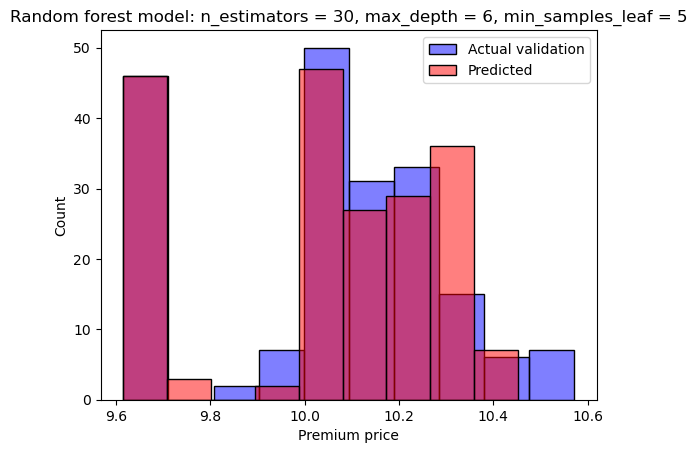

In [36]:
sns.histplot(y_val, color = 'b', label = "Actual validation", alpha = 0.5)
sns.histplot(y_pred, color = 'r', label = "Predicted", alpha = 0.5)
plt.legend()
plt.title("Random forest model: n_estimators = 30, max_depth = 6, min_samples_leaf = 5")
plt.xlabel("Premium price")

In [37]:
importances = rf.feature_importances_

f_importances = dict(zip(feature_names_out, importances))
dict(sorted(f_importances.items(), key = lambda item: item[1]))

{'diabetes': 0.0003500901341099772,
 'knownallergies': 0.0005342354732791907,
 'bloodpressureproblems': 0.0046457973786712846,
 'height': 0.009405140072132714,
 'numberofmajorsurgeries': 0.012702668643448085,
 'historyofcancerinfamily': 0.01710464649144027,
 'anychronicdiseases': 0.040677274978714255,
 'weight': 0.0486477387142766,
 'anytransplants': 0.05026049787313951,
 'age': 0.8156719102407882}

In [38]:
# Uncomment to plot the tree
#fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,6), dpi = 1000)
#tree.plot_tree(rf.estimators_[0], feature_names = feature_names_out, filled = True);

- In order to find the best parameters for the random forest models various combinations of estimators numbers, leaves and depth settings were tested. Since scores for some combinations were similar, parameters with the smallest depth and number of estimators were chosen. At the same time, the number of samples in each leaf was selected to be as big as possible. Compared to linear models, random forest models show improvement in RMSE scores. Speaking about the model itself, feature importance coefficients show that age variable has the biggest impact on the prediction. 

## XGBoost

In [39]:
dtrain = xgb.DMatrix(X_train, label = y_train, feature_names = feature_names_out)
dval = xgb.DMatrix(X_val, label = y_val, feature_names = feature_names_out)

In [40]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,}

In [41]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

xgb_model = xgb.train(xgb_params, dtrain, num_boost_round = 30, evals = watchlist)

[0]	train-rmse:6.70416	val-rmse:6.68127
[1]	train-rmse:4.70030	val-rmse:4.67740
[2]	train-rmse:3.29665	val-rmse:3.27500
[3]	train-rmse:2.31358	val-rmse:2.29277
[4]	train-rmse:1.62560	val-rmse:1.60620
[5]	train-rmse:1.14461	val-rmse:1.12690
[6]	train-rmse:0.80891	val-rmse:0.79499
[7]	train-rmse:0.57504	val-rmse:0.56429
[8]	train-rmse:0.41265	val-rmse:0.40493
[9]	train-rmse:0.30090	val-rmse:0.29608
[10]	train-rmse:0.22373	val-rmse:0.22140
[11]	train-rmse:0.17023	val-rmse:0.17512
[12]	train-rmse:0.13417	val-rmse:0.14618
[13]	train-rmse:0.11037	val-rmse:0.12949
[14]	train-rmse:0.09552	val-rmse:0.12168
[15]	train-rmse:0.08195	val-rmse:0.11714
[16]	train-rmse:0.07050	val-rmse:0.11378
[17]	train-rmse:0.06371	val-rmse:0.11323
[18]	train-rmse:0.05768	val-rmse:0.11210
[19]	train-rmse:0.05460	val-rmse:0.11168
[20]	train-rmse:0.05042	val-rmse:0.11075
[21]	train-rmse:0.04750	val-rmse:0.11164
[22]	train-rmse:0.04479	val-rmse:0.11128
[23]	train-rmse:0.04340	val-rmse:0.11154
[24]	train-rmse:0.04056	va

In [42]:
y_pred = xgb_model.predict(dval)

print(mean_squared_error(y_val, y_pred, squared = False))

0.11321423087871643


Text(0.5, 0, 'Premium price')

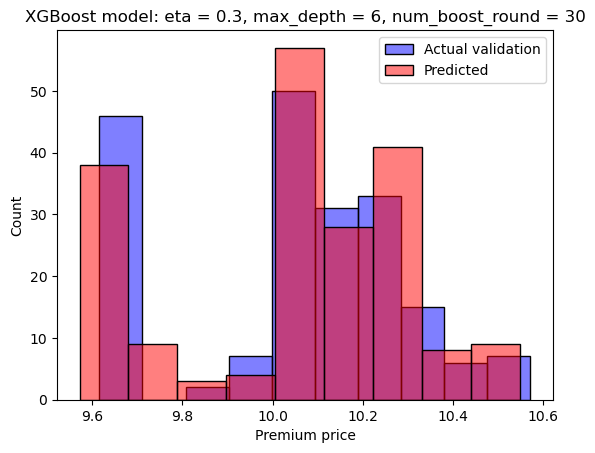

In [43]:
sns.histplot(y_val, color = 'b', label = "Actual validation", alpha = 0.5)
sns.histplot(y_pred, color = 'r', label = "Predicted", alpha = 0.5)
plt.legend()
plt.title("XGBoost model: eta = 0.3, max_depth = 6, num_boost_round = 30")
plt.xlabel("Premium price")

- When training XGBoost model various parameters combinations were tried as well: different learning rate values, different numbers of round, tree depth. As a result, the optimal combination was found. Model scores are close to the values obtained from random forest models.

## Evaluation on test data

In [44]:
df_full_train = df_full_train.reset_index(drop = True)

In [45]:
y_full_train = np.log1p(df_full_train['premiumprice'].values)

del df_full_train['premiumprice']

In [46]:
dv = DictVectorizer(sparse=False)

dicts_full_train = df_full_train.to_dict(orient = 'records')
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient = 'records')
X_test = dv.transform(dicts_test)

In [47]:
#Best linear
ridge = Ridge(alpha = 1.0)
ridge.fit(X_full_train, y_full_train)

y_pred_ridge = ridge.predict(X_test)

print("RMSE: %.4f" % mean_squared_error(y_test, y_pred_ridge, squared = False))
print("R^2: %.4f" % r2_score(y_test, y_pred_ridge))

RMSE: 0.1671
R^2: 0.6109


In [48]:
#Best Random Forest
rf = RandomForestRegressor(n_estimators = 50, max_depth = 6, min_samples_leaf = 5, random_state = 1, n_jobs=-1)

rf.fit(X_full_train, y_full_train)

y_pred_rf = rf.predict(X_test)

print("RMSE: %.4f" % mean_squared_error(y_test, y_pred_rf, squared = False))
print("R^2: %.4f" % r2_score(y_test, y_pred_rf))

RMSE: 0.1379
R^2: 0.7352


In [49]:
feat_names = dv.get_feature_names_out()

In [50]:
#Best XGB
dfulltrain = xgb.DMatrix(X_full_train, label = y_full_train, feature_names = feat_names)
dtest = xgb.DMatrix(X_test, feature_names = feat_names)

In [51]:
xgb_model = xgb.train(xgb_params, dtrain, num_boost_round = 30)

y_pred_xgb = xgb_model.predict(dtest)

print("RMSE: %.4f" % mean_squared_error(y_test, y_pred_xgb, squared = False))
print("R^2: %.4f" % r2_score(y_test, y_pred_xgb))

RMSE: 0.1358
R^2: 0.7432


- Compared on test data, XGBoost and random forest models show the best results.
- In order to obtain "real" premium price values (not log transformed) we need to apply the following transformation:

In [52]:
predictions = np.expm1(y_pred_xgb)
test = np.expm1(y_test)
print(predictions)

[29658.896 24143.275 25375.666 29575.88  33319.625 26599.656 29973.91
 27209.158 22579.744 23042.266 15331.845 20734.744 34675.164 25202.809
 29108.422 16769.777 23666.236 35977.023 20922.285 29152.373 19669.44
 29600.602 29424.041 29294.43  24386.494 23085.312 17825.557 24127.393
 27734.535 30931.668 29761.498 22244.91  23604.045 14940.109 21840.719
 25288.643 23795.445 15870.561 25543.203 14421.638 23023.418 30365.158
 26242.955 29150.01  16046.213 14511.527 28260.564 23599.59  27733.557
 29065.008 28160.48  27964.945 27660.096 28223.639 30826.504 15008.117
 23560.459 29171.174 26527.53  24714.025 23940.172 22818.7   14553.69
 23236.643 22376.855 22659.8   24101.703 24522.486 27014.793 28461.451
 23369.59  14858.359 14883.095 29315.67  15603.766 39749.656 28679.705
 28849.791 24712.895 23803.117 35852.86  25572.43  34763.273 23292.135
 29018.477 28116.871 15094.621 15815.379 24127.393 14836.85  32927.63
 33017.625 28305.963 15123.7   35209.11  19820.863 28525.42  25770.275
 33079.37 